



**Занятие 3
. Регрессия. Основые термины в машинном обучении.**

---

**Среднее значение, медиана и мода**


Что мы можем узнать, глядя на группу чисел?

В машинном обучении (и в математике) нас часто интересуют три значения:

* Среднее - среднее значение
* Медиана - среднее значение точки
* Мода — наиболее распространенное значение.


Чтобы вычислить среднее значение, найдите сумму всех значений и разделите сумму на количество значений:

In [ ]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

In [ ]:
len(speed)

In [ ]:
(99+86+87+88+111+86+103+87+94+78+77+85+86)/13

In [ ]:
import numpy

In [ ]:
numpy.mean(speed)

Медиана это значение, посередине выборки после того, как вы отсортировали все значения по возрастанию

In [ ]:
speed.sort()

In [ ]:
speed

In [ ]:
numpy.median(speed)

Мода — это значение, которое появляется в выборке наибольшее количество раз:

In [ ]:
import statistics

x = statistics.mode(speed)

print(x)

**Cтандартное отклонение**


Стандартное отклонение — это число, которое описывает, насколько разбросаны значения.

Низкое стандартное отклонение означает, что большинство чисел близки к среднему (mean) значению.

Высокое стандартное отклонение означает, что значения разбросаны по более широкому диапазону.

In [ ]:
speed_1 = [86,87,88,86,87,85,86]

In [ ]:
numpy.std(speed_1)

In [ ]:
speed_2 = [32,111,138,28,59,77,97]

In [ ]:
numpy.std(speed_2)

**Перцентили**

Перцентиль это значение, которое заданная случайная величина не превышает с фиксированной вероятностью, заданной в процентах.

Пример: допустим, у нас есть массив возрастов всех людей, живущих на улице.

In [ ]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

In [ ]:
x = numpy.percentile(ages, 75)

print(x)

Чему равен 75 процентиль? В данном случае он равен 43, что означает, что 75%  людей живущих на улице моложе 43 лет.


In [ ]:
numpy.percentile(ages, 90)

**Регрессия**

---




Термин регрессия используется, когда вы пытаетесь найти взаимосвязь между переменными.

В машинном обучении и статистическом моделировании эта связь используется для прогнозирования исхода будущих событий.

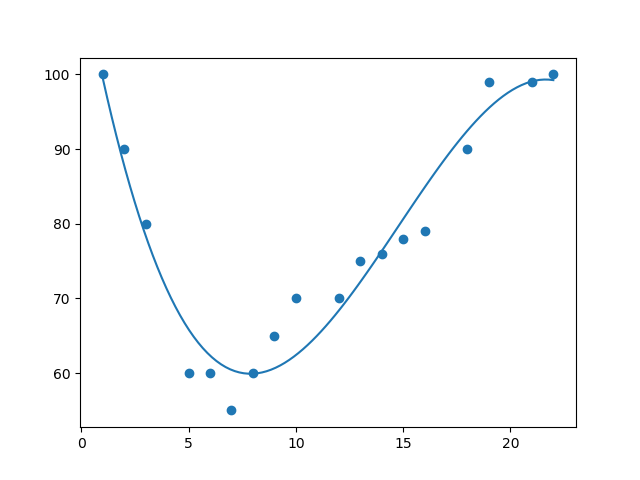

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
df_housing = pd.read_csv('https://drive.google.com/uc?id=1D3OXD4lij_2nO1BYtkF-7b045K9gGVfc')

In [ ]:
df_housing.head()

In [ ]:
df_housing.info()

In [ ]:
df_housing.tail(30)

In [ ]:
df_housing['price_th'] = df_housing['price'].apply(lambda x: round((x / 1000), 2))

In [ ]:
df_housing.tail(30)

In [ ]:
len(df_housing[df_housing['price_th'] == 0.0])

In [ ]:
df_housing.waterfront.value_counts()

In [ ]:
df_housing.view.value_counts()

In [ ]:
df_housing.condition.value_counts()

In [ ]:
df_housing.columns

In [ ]:
df_housing.city.value_counts()

In [ ]:
df_housing.drop(columns=['date', 'price', 'street', 'statezip', 'country', 'city'], inplace= True)

In [ ]:
df_housing.drop(df_housing[df_housing['price_th'] == 0.0].index, inplace = True)

In [ ]:
df_housing.info()

In [ ]:
df_housing_clean = df_housing.copy()

In [ ]:
df_housing_clean

In [ ]:
def draw_corr_matrix(df: pd.DataFrame, shape: int): # df-ваш датафрейм, shape - размер матрицы
    df = df.corr().copy()
    plt.rcParams["figure.figsize"] = shape,shape
    plt.imshow(df, cmap ='viridis')


    plt.colorbar()

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            text = plt.text(j, i, round(float(df.iloc[i, j]),2),
                        ha="center", va="center", color="r")

    plt.xticks(range(len(df)), df.columns, rotation = 45)


    plt.yticks(range(len(df)), df.index)

    plt.show()

In [ ]:
draw_corr_matrix(df_housing_clean, 8)

In [ ]:
df_housing_clean.drop(columns=['condition', 'yr_built', 'yr_renovated'], inplace=True)

In [ ]:
df_housing_clean.columns

In [ ]:
x = df_housing_clean[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement']]

In [ ]:
x

In [ ]:
y = df_housing_clean['price_th']

In [ ]:
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=10)

In [ ]:
len(x_train)

In [ ]:
len(y_train)

Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
r2_score(lr.predict(x_test), y_test)

Рандомный лес


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
r2_score(rf.predict(x_test), y_test)

Градиентный спуск

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
gb.fit(x_train, y_train)

In [ ]:
r2_score(gb.predict(x_test), y_test)

ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
el = ElasticNet(max_iter=5000)

In [ ]:
el.fit(x_train, y_train)

In [ ]:
el.score(x_test, y_test)

BayesianRidge

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
br = BayesianRidge()

In [ ]:
br.fit(x_train, y_train)

In [ ]:
br.score(x_test, y_test)

# Задание №1

Датасет 2: https://drive.google.com/file/d/1l0VUmXhllUhezGnIvPPuiPAv70e8B-pZ/view?usp=share_link

1. Загрузить и очистить датасет, выделить целевую переменную, разделить на обучающие и тестовые выборки
2. Реализовать произвольный алгоритм регрессии
3. Посчитать score

In [113]:
ca_housing = pd.read_csv('https://drive.google.com/uc?id=1l0VUmXhllUhezGnIvPPuiPAv70e8B-pZ')

In [114]:
ca_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [115]:
ca_housing[ca_housing.isna().any(axis=1)]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [116]:
ca_housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [117]:
ca_housing.total_bedrooms = ca_housing.total_bedrooms.fillna(ca_housing.total_bedrooms.median())
ca_housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [118]:
ca_housing.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Целевым показателем будет нахождение дома (в какой именно местности)

In [124]:
replace_dict = {
    "<1H OCEAN": 1,
    "INLAND": 2,
    "NEAR OCEAN": 3,
    "NEAR BAY": 4,
    "ISLAND": 5
}

ca_housing.loc[:, 'ocean_proximity'] = ca_housing['ocean_proximity'].map(replace_dict)
ca_housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,4
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,4
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,4
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,4
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,4
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,4
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,4
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,4
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,4


In [125]:
ca_housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.439870
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.390957
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.145163
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.016309
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.021197
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.083537
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.027144
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,-0.039673
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.021732
ocean_proximity,-0.439870,0.390957,0.145163,-0.016309,-0.021197,-0.083537,-0.027144,-0.039673,0.021732,1.000000


In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [133]:
print(y.unique())  # Уникальные значения в y
print(y.isnull().sum())  # Количество пропущенных значений

['4' '1' '2' '3' '5']
0


In [144]:
X = ca_housing.drop('population', axis=1)
y = ca_housing['population']

y = y.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(y_pred[:5])
print(y_test.values[:5])
print(accuracy_score(y_test, y_pred))

['1341' '5613' '837' '1277' '837']
['1392' '1565' '1310' '1705' '1063']
0.00024224806201550387


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




---



Grid Search

Большинство моделей машинного обучения содержат параметры, которые можно настроить, чтобы изменить способ обучения модели. Например, модель логистической регрессии от sklearn имеет параметр C, который управляет регуляризацией, что влияет на сложность модели.

Как мы выбираем лучшее значение для C? Наилучшее значение зависит от данных, используемых для обучения модели.

Один из методов заключается в том, чтобы попробовать разные значения, а затем выбрать значение, дающее наилучший результат. Этот метод известен как поиск по сетке. Если бы нам нужно было выбрать значения для двух или более параметров, мы бы оценили все комбинации наборов значений, таким образом сформировав сетку значений.

Прежде чем мы перейдем к примеру, полезно знать, что делает параметр, который мы изменяем. Более высокие значения C сообщают модели, что обучающие данные напоминают информацию из реального мира, и придают больший вес обучающим данным. В то время как более низкие значения C делают обратное.

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

print(logit.fit(X,y))

print(logit.score(X,y))

In [ ]:
X = iris['data']
y = iris['target']

lr = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag' , 'saga']

scores = []
best_score = 0.0
for solver in solvers:
    for choice in C:
        lr.set_params(C=choice, solver = solver)
        lr.fit(X, y)
        score = lr.score(X, y)
        if score > best_score:
            best_score = score
            best_params = [choice, solver]


In [ ]:
best_score

In [ ]:
best_params

In [ ]:
logit = LogisticRegression(max_iter = 10000, solver = 'lbfgs', C = 1.75)
logit.fit(X, y)
logit.score(X, y)

# Задание №2

Wine quality dataset:

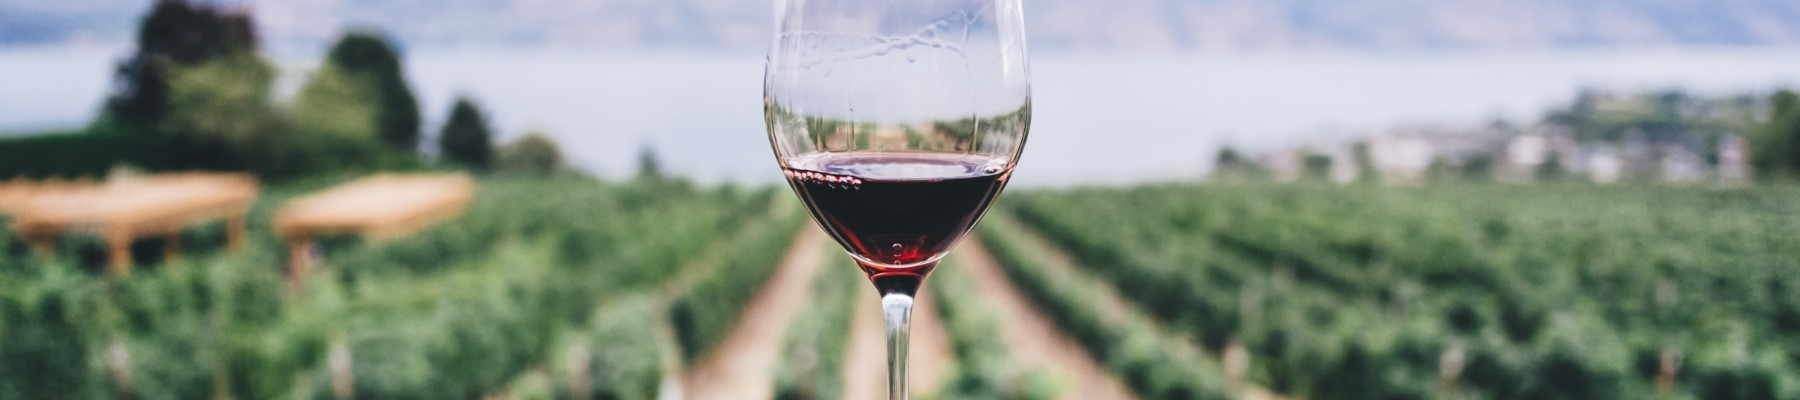


https://drive.google.com/file/d/14i2TtlcD931sb3-T1zOsgzL-2xggNx3G/view?usp=share_link

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


In [145]:
wine_df = pd.read_csv('https://drive.google.com/uc?id=14i2TtlcD931sb3-T1zOsgzL-2xggNx3G')

In [146]:
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [155]:
wine_df.quality.value_counts()
wine_df.type.value_counts()

,count
type,
white,4898
red,1599


https://scikit-learn.org/1.5/index.html

1. Загрузить и очистить датасет
2. Решить вопрос с пропущенными значениями.
3. Построить матрицу корреляции


4. Выделить целевую переменную quality, разделить на обучающие и тестовые выборки
5. Реализовать произвольный алгоритм регрессии использовать GridSearch
6. Посчитать r2 score

In [151]:
import pandas as pd
import numpy as np

url = 'https://drive.google.com/uc?id=14i2TtlcD931sb3-T1zOsgzL-2xggNx3G'
wine_df = pd.read_csv(url)

print(wine_df.head(), '\n')
print(wine_df.isnull().sum())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [152]:
for column in wine_df.columns:
    if wine_df[column].isnull().sum() > 0:
        wine_df[column] = wine_df[column].fillna(wine_df[column].mean())

print(wine_df.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [156]:
wine_df['type'] = wine_df['type'].map({'white': 0, 'red': 1})

wine_df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,0,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


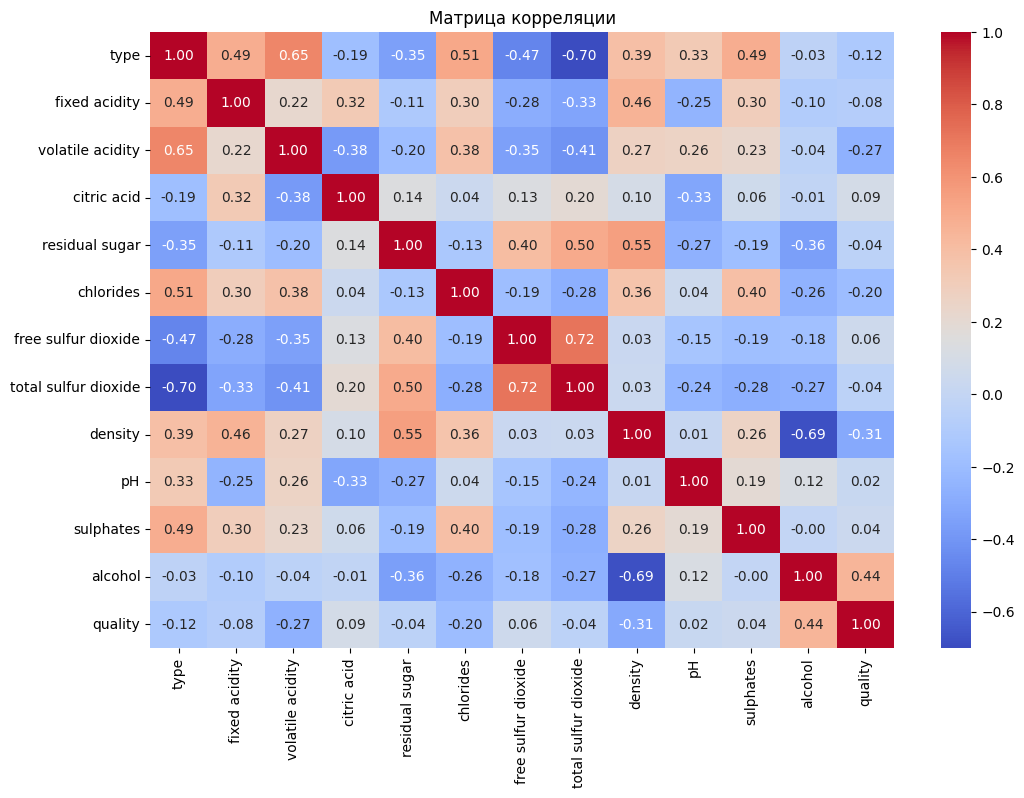

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = wine_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

In [158]:
from sklearn.preprocessing import StandardScaler
X = wine_df.drop(columns=['quality'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled['quality'] = wine_df['quality']

print(X_scaled.head())

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0 -0.571367      -0.167159         -0.423564     0.284245        3.206977   
1 -0.571367      -0.707427         -0.241232     0.146523       -0.808136   
2 -0.571367       0.681835         -0.362786     0.559689        0.306005   
3 -0.571367      -0.012796         -0.666673     0.008801        0.642350   
4 -0.571367      -0.012796         -0.666673     0.008801        0.642350   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0  -0.315222             0.815565              0.959976  2.102214 -1.359665   
1  -0.201027            -0.931107              0.287618 -0.232332  0.508045   
2  -0.172479            -0.029599             -0.331660  0.134525  0.259017   
3   0.055911             0.928254              1.243074  0.301278 -0.176782   
4   0.055911             0.928254              1.243074  0.301278 -0.176782   

   sulphates   alcohol  quality  
0  -0.545959 -1.418558      

In [159]:
from sklearn.preprocessing import MinMaxScaler

X = wine_df.drop(columns=['quality'])

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled['quality'] = wine_df['quality']

print(X_scaled.head())

   type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0.0       0.264463          0.126667     0.216867        0.308282   
1   0.0       0.206612          0.146667     0.204819        0.015337   
2   0.0       0.355372          0.133333     0.240964        0.096626   
3   0.0       0.280992          0.100000     0.192771        0.121166   
4   0.0       0.280992          0.100000     0.192771        0.121166   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0   0.059801             0.152778              0.377880  0.267785  0.217054   
1   0.066445             0.045139              0.290323  0.132832  0.449612   
2   0.068106             0.100694              0.209677  0.154039  0.418605   
3   0.081395             0.159722              0.414747  0.163678  0.364341   
4   0.081395             0.159722              0.414747  0.163678  0.364341   

   sulphates   alcohol  quality  
0   0.129213  0.115942        6  
1   0.151685  0.21

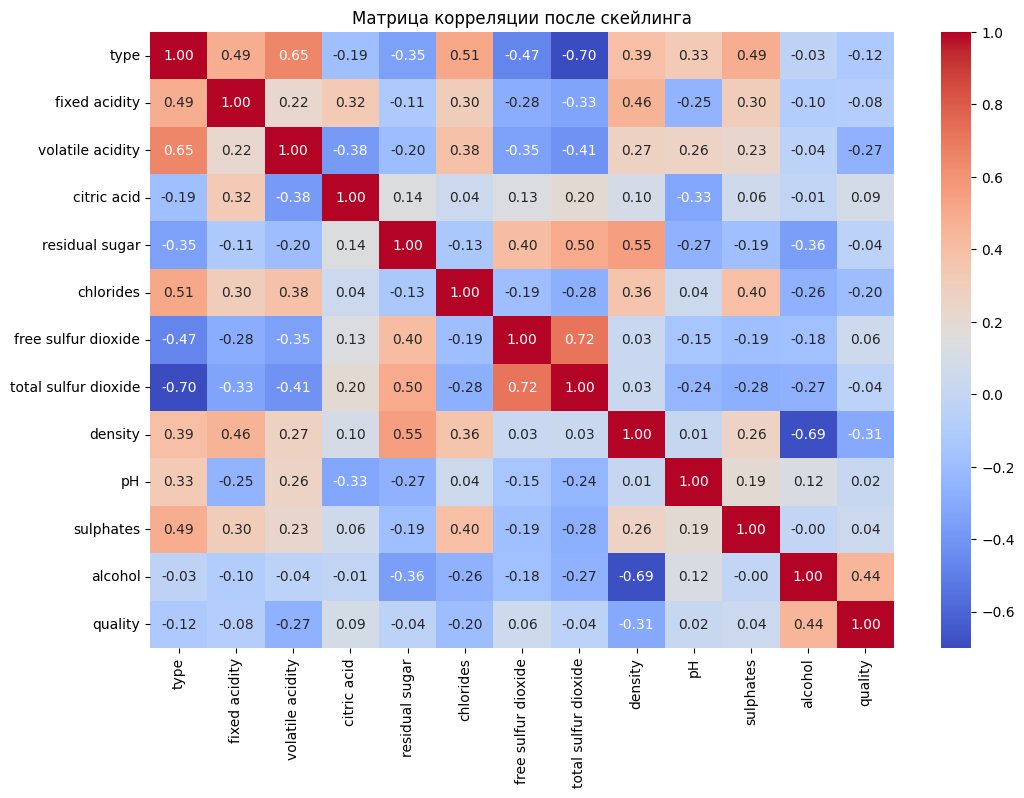

In [160]:
corr_matrix = X_scaled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

In [170]:
from sklearn.model_selection import train_test_split

X = X_scaled.drop(columns=['quality'])
y = X_scaled['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(5197, 12) (1300, 12)


In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)

0.5577226117974091


Линейная регрессия

Рандомный лес


Градиентный спуск

ElasticNet

BayesianRidge